In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

dir_path = '/kaggle/input'
tot_files = 0
folder_counts = []

print("Loading....")
print(f"Total no.of files in the directory are {sum([len(files) for _, _, files in os.walk(dir_path)])}.")

for dirname, _, filenames in os.walk(dir_path):
    total_size = 0
    folder_name = os.path.basename(dirname)
    tot_files += len(filenames)
    if tot_files > 0:
        folder_counts.append((folder_name, tot_files))
    tot_files = 0
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        try:
            total_size += os.path.getsize(filepath)
        except OSError:
            continue

# Sort folder counts by folder name
folder_counts.sort()

# Print sorted folder counts
for folder_name, count in folder_counts:
    print(f"{folder_name} contains {count} files.")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Loading....
Total no.of files in the directory are 29291.
Apple__Healthy contains 2438 files.
Apple__Rotten contains 2930 files.
Banana__Healthy contains 2000 files.
Banana__Rotten contains 2800 files.
Bellpepper__Healthy contains 611 files.
Bellpepper__Rotten contains 591 files.
Carrot__Healthy contains 620 files.
Carrot__Rotten contains 580 files.
Cucumber__Healthy contains 608 files.
Cucumber__Rotten contains 593 files.
Grape__Healthy contains 200 files.
Grape__Rotten contains 200 files.
Guava__Healthy contains 200 files.
Guava__Rotten contains 200 files.
Jujube__Healthy contains 200 files.
Jujube__Rotten contains 200 files.
Mango__Healthy contains 1813 files.
Mango__Rotten contains 2247 files.
Orange__Healthy contains 2075 files.
Orange__Rotten contains 2186 files.
Pomegranate__Healthy contains 200 files.
Pomegranate__Rotten contains 200 files.
Potato__Healthy contains 615 files.
Potato__Rotten contains 585 files.
Strawberry__Healthy contains 1603 files.
Strawberry__Rotten contains

In [6]:
import torch
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim
from sklearn.model_selection import train_test_split
print("Compiled Successfully")

Compiled Successfully


In [7]:
data_path = '/kaggle/input/fruit-and-vegetable-disease-healthy-vs-rotten/Fruit And Vegetable Diseases Dataset'
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(), 
    transforms.Normalize((0.485,0.456,0.406), (0.229,0.224,0.225))
])
print("Compiled Successfully")

Compiled Successfully


In [8]:
class_names = sorted(os.listdir(data_path))

for index, name in enumerate(class_names):
    print(f"Class index: {index}, Class name: {name}")

Class index: 0, Class name: Apple__Healthy
Class index: 1, Class name: Apple__Rotten
Class index: 2, Class name: Banana__Healthy
Class index: 3, Class name: Banana__Rotten
Class index: 4, Class name: Bellpepper__Healthy
Class index: 5, Class name: Bellpepper__Rotten
Class index: 6, Class name: Carrot__Healthy
Class index: 7, Class name: Carrot__Rotten
Class index: 8, Class name: Cucumber__Healthy
Class index: 9, Class name: Cucumber__Rotten
Class index: 10, Class name: Grape__Healthy
Class index: 11, Class name: Grape__Rotten
Class index: 12, Class name: Guava__Healthy
Class index: 13, Class name: Guava__Rotten
Class index: 14, Class name: Jujube__Healthy
Class index: 15, Class name: Jujube__Rotten
Class index: 16, Class name: Mango__Healthy
Class index: 17, Class name: Mango__Rotten
Class index: 18, Class name: Orange__Healthy
Class index: 19, Class name: Orange__Rotten
Class index: 20, Class name: Pomegranate__Healthy
Class index: 21, Class name: Pomegranate__Rotten
Class index: 22, 

In [9]:
dataset = datasets.ImageFolder(data_path, transform = transform)

labels = np.array(dataset.targets)
train_indices, test_indices = train_test_split(np.arange(len(labels)), test_size = 0.2, stratify = labels, random_state = 42)
train_indices, valid_indices = train_test_split(train_indices, test_size = 0.1, stratify = labels[train_indices], random_state = 42)                                               

train_data = Subset(dataset, train_indices)
valid_data = Subset(dataset, valid_indices)
test_data = Subset(dataset, test_indices)
train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
valid_loader = DataLoader(valid_data, batch_size = 32, shuffle = False)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = False)
print("Compiled Successfully")

Compiled Successfully


In [11]:
print("Train size:",len(train_data))
print("Validation size:",len(valid_data))
print("Test size:",len(test_data))

Train size: 21088
Validation size: 2344
Test size: 5859


In [12]:
class CNN(nn.Module):
    def __init__ (self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(in_channels = 3, out_channels = 4, kernel_size = 3, stride = 1, padding = 1), 
            nn.ReLU(),
                                                                                                    #256,256,4
            nn.Conv2d(in_channels = 4, out_channels = 8, kernel_size = 3, stride = 1, padding = 1), 
            nn.ReLU(),
                                                                                                    #256,256,8
            nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, stride = 1, padding = 1), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2),
                                                                                                    #128,128,16
            nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
                                                                                                    #64,64,32
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
                                                                                                    #32,32,64
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
                                                                                                    #16,16,64
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
                                                                                                    #8,8,64
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
                                                                                                    #8,8,128
            nn.Flatten(),
            nn.Linear(128*8*8, 128),
            nn.ReLU(),
            nn.Linear(128, 28)
        )
        
        
    def forward(self, x):
            return self.network(x)
        
print("Compiled Successfully")

Compiled Successfully


In [14]:
device = torch.device('cuda') # used after activating gpu

model = CNN()
model = model.to(device)    #converting model to gpu from cpu
criteria = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3 )
print("Compiled Successfully")

Compiled Successfully


In [10]:
import time
for epoch in range(20):
    start_time = time.time()
    for inp,output in train_loader:
        inp, output = inp.to(device), output.to(device)
        pred_out = model(inp)
        loss = criteria(pred_out, output)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    end_time = time.time()
    epoch_time = end_time - start_time
    print(f"loss value of epoch {epoch+1} = {loss} in {epoch_time:.4f} seconds")
    if loss<=0.02:
        break;

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


loss value of epoch 1 = 1.7736369371414185 in 375.7700 seconds
loss value of epoch 2 = 1.5315937995910645 in 263.5113 seconds
loss value of epoch 3 = 0.9358486533164978 in 262.7213 seconds
loss value of epoch 4 = 0.7299679517745972 in 262.5646 seconds
loss value of epoch 5 = 0.787995457649231 in 261.8639 seconds
loss value of epoch 6 = 0.5474742650985718 in 263.6992 seconds
loss value of epoch 7 = 0.2843969762325287 in 264.2008 seconds
loss value of epoch 8 = 0.3136783242225647 in 264.7271 seconds
loss value of epoch 9 = 0.20740295946598053 in 259.9009 seconds
loss value of epoch 10 = 0.20518489181995392 in 258.9554 seconds
loss value of epoch 11 = 0.10962236672639847 in 259.6036 seconds
loss value of epoch 12 = 0.05693911388516426 in 258.6101 seconds
loss value of epoch 13 = 0.19803109765052795 in 259.9595 seconds
loss value of epoch 14 = 0.026526041328907013 in 259.0547 seconds
loss value of epoch 15 = 0.1280064731836319 in 258.2113 seconds
loss value of epoch 16 = 0.3029798865318298

In [15]:
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for inp, out in loader:
            inp,out = inp.to(device), out.to(device)
            scores = model(inp)
            _, predictions = scores.max(1)
            correct += (predictions == out).sum().item()
            total += predictions.size(0)
    model.train()
    return correct/total

In [16]:
print(f"Training Accuracy is {calculate_accuracy(train_loader, model)*100}")
print(f"Validation Accuracy is {calculate_accuracy(valid_loader, model)*100}")
print(f"Testing Accuracy is {calculate_accuracy(test_loader, model)*100}")

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training Accuracy is 0.6828528072837633
Validation Accuracy is 0.6825938566552902
Testing Accuracy is 0.682710360129715


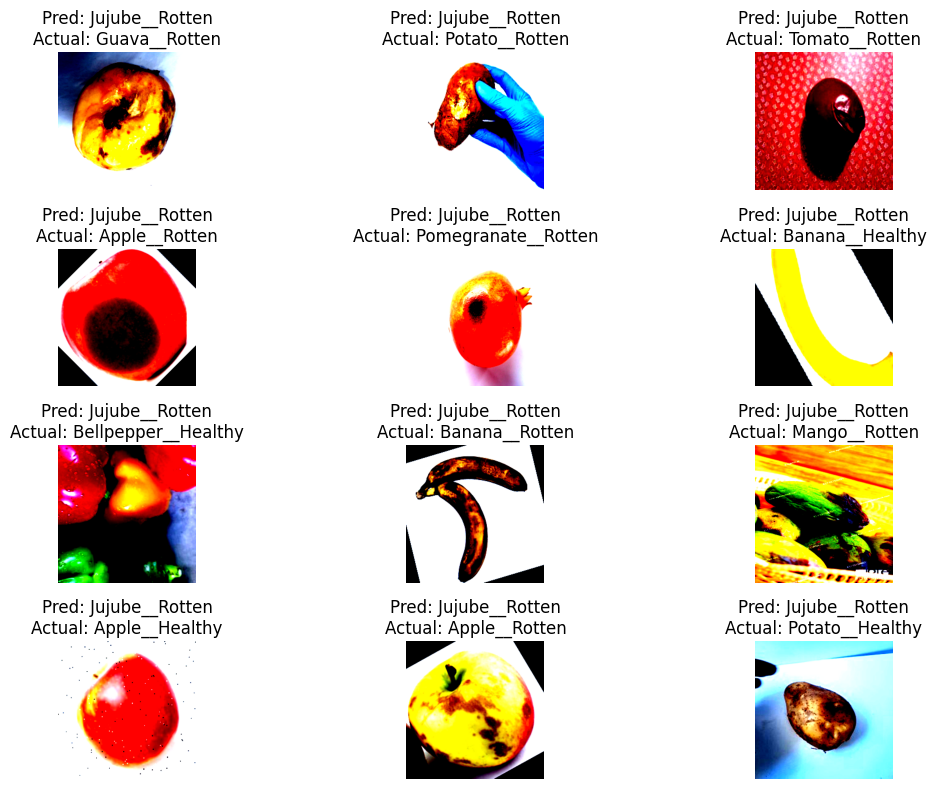

In [23]:
import random

import matplotlib.pyplot as plt
def show_images(images, titles, rows=4, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    for i, (img, title) in enumerate(zip(images, titles)):
        ax = axes[i // cols, i % cols]
        img = img.cpu().numpy().transpose((1, 2, 0))  # Convert to HWC format for displaying and move to CPU
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Number of images to display
num_images = 12

# Randomly select indices from the test dataset
indices = random.sample(range(len(test_data)), num_images)
images, titles = [], []

# Set the model to evaluation mode and move to the appropriate device
model.to(device)
model.eval()

# Disable gradient calculation
with torch.no_grad():
    for idx in indices:
        # Get the image and label from the test dataset
        image, label = test_data[idx]
        
        # Move the image to the appropriate device
        image = image.to(device)
        
        images.append(image.cpu())  # Append the image (moved back to CPU for display)
        
        # Get the model's prediction
        output = model(image.unsqueeze(0))
        _, predicted = torch.max(output, 1)
        
        # Get class names
        actual_class = dataset.classes[label]
        predicted_class = dataset.classes[predicted.item()]
        
        # Create a title with predicted and actual class names
        titles.append(f'Pred: {predicted_class}\nActual: {actual_class}')

# Display the images with titles
show_images(images, titles)


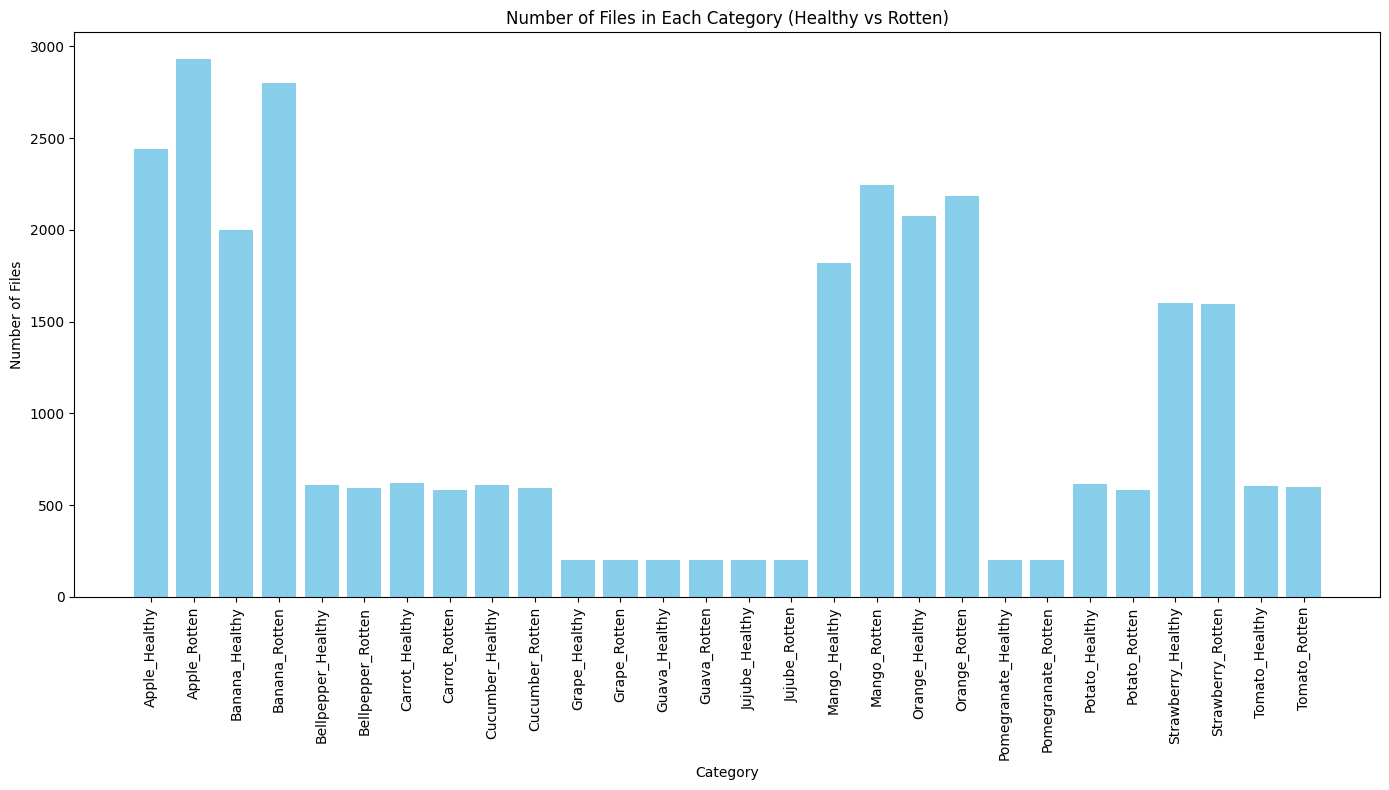

In [22]:
import matplotlib.pyplot as plt

# Data
labels = [
    "Apple_Healthy", "Apple_Rotten", "Banana_Healthy", "Banana_Rotten", "Bellpepper_Healthy",
    "Bellpepper_Rotten", "Carrot_Healthy", "Carrot_Rotten", "Cucumber_Healthy", "Cucumber_Rotten",
    "Grape_Healthy", "Grape_Rotten", "Guava_Healthy", "Guava_Rotten", "Jujube_Healthy",
    "Jujube_Rotten", "Mango_Healthy", "Mango_Rotten", "Orange_Healthy", "Orange_Rotten",
    "Pomegranate_Healthy", "Pomegranate_Rotten", "Potato_Healthy", "Potato_Rotten",
    "Strawberry_Healthy", "Strawberry_Rotten", "Tomato_Healthy", "Tomato_Rotten"
]
values = [
    2438, 2930, 2000, 2800, 611, 591, 620, 580, 608, 593, 200, 200, 200, 200, 200, 200,
    1818, 2247, 2075, 2186, 200, 200, 615, 585, 1603, 1596, 604, 596
]

# Create bar graph
plt.figure(figsize=(14, 8))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Category (Healthy vs Rotten)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()